EDA de los datos de Accidentes viales en CABA, Argentina:

In [72]:
# Librerías necesarias
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# Abrir archivos .csv HOMICIDIOS GENERAL
data_homicidios_gral = pd.read_csv("df_homic_lista.csv")

In [74]:
# Abrir archivos .csv HOMICIOS ESPECÍFICOS
data_homicidios_espec = pd.read_csv("espec_homicid.csv")

In [75]:
# Abrir archivos .csv LESIONADOS GENERAL
data_lesionados_gral = pd.read_csv("df_les_lista.csv")

In [76]:
# Abrir archivos .csv LESIONADOS ESPECÍFICOS
data_lesionados_espec = pd.read_csv("espec_lesion.csv")

In [77]:
data_homicidios_gral.head(2)

,Unnamed: 0,ID,N_VICTIMAS,Agno,Mes,Día,franja_hora_new,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,0,2016-0001,1,2016,1,1,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,0,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,1,2016-0002,1,2016,1,2,1,AV GRAL PAZ Y AV DE LOS CORRALES,AVENIDA,"PAZ, GRAL. AV.",0,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [78]:
data_homicidios_espec.head(2)

,Unnamed: 0,ID_hecho,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,Agno_fallec,Mes_fallec,Día_fallec
0,0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016,1,1
1,1,2016-0002,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016,1,2


In [79]:
# Unir las datas de homicidio gral y específico
df_unido_homicidios = pd.merge(data_homicidios_gral[[   "ID", "N_VICTIMAS", "Agno", "Mes", "Día", "franja_hora_new", "TIPO_DE_CALLE",
                                                        "COMUNA", "pos x", "pos y", "PARTICIPANTES", "VICTIMA", "ACUSADO"]],
                                data_homicidios_espec[[ "ID_hecho", "AAAA", "MM", "DD", "ROL", "SEXO", "EDAD",
                                                        "Agno_fallec", "Mes_fallec", "Día_fallec"]],
                                                        left_index=True, right_index=True)

In [80]:
df_unido_homicidios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 695
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               696 non-null    object
 1   N_VICTIMAS       696 non-null    int64 
 2   Agno             696 non-null    int64 
 3   Mes              696 non-null    int64 
 4   Día              696 non-null    int64 
 5   franja_hora_new  696 non-null    int64 
 6   TIPO_DE_CALLE    696 non-null    object
 7   COMUNA           696 non-null    int64 
 8   pos x            696 non-null    object
 9   pos y            696 non-null    object
 10  PARTICIPANTES    696 non-null    object
 11  VICTIMA          696 non-null    object
 12  ACUSADO          696 non-null    object
 13  ID_hecho         696 non-null    object
 14  AAAA             696 non-null    int64 
 15  MM               696 non-null    int64 
 16  DD               696 non-null    int64 
 17  ROL              696 non-null    object


In [81]:
# Ver valores de algunas columnas con string:
df_unido_homicidios["TIPO_DE_CALLE"].unique()

array(['AVENIDA', 'CALLE', 'AUTOPISTA'], dtype=object)

In [82]:
# Reemplazar los valores
df_unido_homicidios["TIPO_DE_CALLE"] = df_unido_homicidios["TIPO_DE_CALLE"].replace({
    "AVENIDA": 0,
    "CALLE": 1,
    "AUTOPISTA": 2
})

In [83]:
# Ver valores de algunas columnas con string:
df_unido_homicidios["PARTICIPANTES"].unique()

array(['MOTO-AUTO', 'AUTO-PASAJEROS', 'MOTO-SD', 'MOTO-PASAJEROS',
       'MOTO-OBJETO FIJO', 'MOTO-CARGAS', 'PEATON-AUTO', 'PEATON-MOTO',
       'PEATON-PASAJEROS', 'AUTO-AUTO', 'AUTO-OBJETO FIJO',
       'PEATON-CARGAS', 'MOTO-MOTO', 'MULTIPLE', 'SD-SD', 'AUTO-CARGAS',
       'AUTO-SD', 'MOTO-MOVIL', 'CARGAS-CARGAS', 'PEATON-SD',
       'BICICLETA-CARGAS', 'SD-CARGAS', 'BICICLETA-PASAJEROS',
       'PASAJEROS-PASAJEROS', 'MOVIL-PASAJEROS', 'CARGAS-OBJETO FIJO',
       'PEATON-BICICLETA', 'SD-AUTO', 'CARGAS-AUTO', 'BICICLETA-AUTO',
       'MOTO-BICICLETA', 'SD-MOTO', 'MOVIL-CARGAS', 'PASAJEROS-AUTO',
       'AUTO-MOVIL', 'CARGAS-PASAJEROS', 'BICICLETA-TREN',
       'BICICLETA-OTRO', 'MOTO-OTRO', 'PEATON_MOTO-MOTO', 'PASAJEROS-SD'],
      dtype=object)

In [84]:
# Reemplazar los valores
df_unido_homicidios["PARTICIPANTES"] = df_unido_homicidios["PARTICIPANTES"].replace({
    "MOTO-AUTO": 0,
    "AUTO-PASAJEROS": 1,
    "MOTO-SD": 2,
    "MOTO-PASAJEROS": 3,
    "MOTO-OBJETO FIJO": 4,
    "MOTO-CARGAS": 5,
    "PEATON-AUTO": 6,
    "PEATON-MOTO": 7,
    "PEATON-PASAJEROS": 8,
    "AUTO-AUTO": 9,
    "AUTO-OBJETO FIJO":10,
    "PEATON-CARGAS": 11,
    "MOTO-MOTO": 12,
    "MULTIPLE": 13,
    "SD-SD": 14,
    "AUTO-CARGAS": 15,
    "AUTO-SD": 16,
    "MOTO-MOVIL": 17,
    "CARGAS-CARGAS": 18,
    "PEATON-SD": 19,
    "BICICLETA-CARGAS": 20,
    "SD-CARGAS": 21,
    "BICICLETA-PASAJEROS": 22,
    "PASAJEROS-PASAJEROS": 23,
    "MOVIL-PASAJEROS": 24,
    "CARGAS-OBJETO FIJO": 25,
    "PEATON-BICICLETA": 26,
    "SD-AUTO": 27,
    "CARGAS-AUTO": 28,
    "BICICLETA-AUTO": 29,
    "MOTO-BICICLETA": 30,
    "SD-MOTO": 31,
    "MOVIL-CARGAS": 32,
    "PASAJEROS-AUTO": 33,
    "AUTO-MOVIL": 34,
    "CARGAS-PASAJEROS": 35,
    "BICICLETA-TREN": 36,
    "BICICLETA-OTRO": 37,
    "MOTO-OTRO": 38,
    "PEATON_MOTO-MOTO": 39,
    "PASAJEROS-SD": 40
})

In [87]:
# Ver valores de algunas columnas con string:
df_unido_homicidios["VICTIMA"].unique()

array(['MOTO', 'AUTO', 'PEATON', 'SD', 'CARGAS', 'BICICLETA', 'PASAJEROS',
       'MOVIL', 'OBJETO FIJO', 'PEATON_MOTO'], dtype=object)

In [88]:
# Reemplazar los valores
df_unido_homicidios["VICTIMA"] = df_unido_homicidios["VICTIMA"].replace({
    "MOTO": 0,
    "AUTO": 1,
    "PEATON": 2,
    "SD": 3,
    "CARGAS": 4,
    "BICICLETA": 5,
    "PASAJEROS": 6,
    "MOVIL": 7,
    "OBJETO FIJO": 8,
    "PEATON_MOTO": 9
})

In [90]:
# Ver valores de algunas columnas con string:
df_unido_homicidios["ACUSADO"].unique()

array(['AUTO', 'PASAJEROS', 'SD', 'OBJETO FIJO', 'CARGAS', 'MOTO',
       'MULTIPLE', 'OTRO', 'BICICLETA', 'TREN'], dtype=object)

In [91]:
# Reemplazar los valores
df_unido_homicidios["ACUSADO"] = df_unido_homicidios["ACUSADO"].replace({
    "AUTO": 0,
    "PASAJEROS": 1,
    "SD": 2,
    "OBJETO FIJO": 3,
    "CARGAS": 4,
    "MOTO": 5,
    "MULTIPLE": 6,
    "OTRO": 7,
    "BICICLETA": 8,
    "TREN": 9
})

In [93]:
# Ver valores de algunas columnas con string:
df_unido_homicidios["ROL"].unique()

array(['CONDUCTOR', 'PASAJERO_ACOMPAÑANTE', 'PEATON', 'SD', 'CICLISTA'],
      dtype=object)

In [94]:
# Reemplazar los valores
df_unido_homicidios["ROL"] = df_unido_homicidios["ROL"].replace({
    "CONDUCTOR": 0,
    "PASAJERO_ACOMPAÑANTE": 1,
    "PEATON": 2,
    "SD": 3,
    "CICLISTA": 4
})

In [96]:
# Ver valores de algunas columnas con string:
df_unido_homicidios["SEXO"].unique()

array(['MASCULINO', 'FEMENINO', 'SD'], dtype=object)

In [97]:
# Reemplazar los valores
df_unido_homicidios["SEXO"] = df_unido_homicidios["SEXO"].replace({
    "MASCULINO": 0,
    "FEMENINO": 1,
    "SD": 2
})

In [107]:
# Supongamos que has eliminado la columna ID, ID_hecho, pos x, pos y, AAAA, MM, DD, Mes_fallec, Día_fallec:
correlation_matrix = df_unido_homicidios.drop(columns=["ID","ID_hecho", "pos x", "pos y", "AAAA", "MM", "DD", "Mes_fallec", "Día_fallec"]).corr()
correlation_matrix

,N_VICTIMAS,Agno,Mes,Día,franja_hora_new,TIPO_DE_CALLE,COMUNA,PARTICIPANTES,VICTIMA,ACUSADO,ROL,SEXO,EDAD,Agno_fallec
N_VICTIMAS,1.000000,-0.047410,-0.005711,0.011469,-0.087807,-0.025605,0.007439,0.035100,0.060681,-0.014812,-0.003860,0.049332,0.012199,0.022010
Agno,-0.047410,1.000000,-0.047072,-0.038222,-0.045460,0.004652,0.009211,0.025529,0.004157,0.037022,0.037704,-0.035092,0.097519,0.491967
Mes,-0.005711,-0.047072,1.000000,-0.019340,0.025587,0.012578,0.047205,0.123636,0.098122,-0.008347,0.018597,0.055434,0.052750,-0.113622
Día,0.011469,-0.038222,-0.019340,1.000000,-0.022709,-0.010617,-0.001171,0.034243,-0.021048,0.080848,0.004208,0.057162,0.113508,-0.020150
franja_hora_new,-0.087807,-0.045460,0.025587,-0.022709,1.000000,0.012884,-0.040506,0.023366,0.111886,0.016143,-0.027327,-0.013691,-0.026488,-0.025402
TIPO_DE_CALLE,-0.025605,0.004652,0.012578,-0.010617,0.012884,1.000000,-0.105885,0.006282,-0.049507,0.060747,0.032176,0.006747,0.055203,-0.033759
COMUNA,0.007439,0.009211,0.047205,-0.001171,-0.040506,-0.105885,1.000000,-0.005794,-0.066353,0.029964,-0.016606,0.018448,-0.002605,-0.037565
PARTICIPANTES,0.035100,0.025529,0.123636,0.034243,0.023366,0.006282,-0.005794,1.000000,0.675695,0.392150,-0.006304,-0.006839,-0.048951,-0.041686
VICTIMA,0.060681,0.004157,0.098122,-0.021048,0.111886,-0.049507,-0.066353,0.675695,1.000000,-0.065276,0.053755,0.038869,-0.056285,-0.037185
ACUSADO,-0.014812,0.037022,-0.008347,0.080848,0.016143,0.060747,0.029964,0.392150,-0.065276,1.000000,-0.008026,-0.011958,-0.011484,0.028624


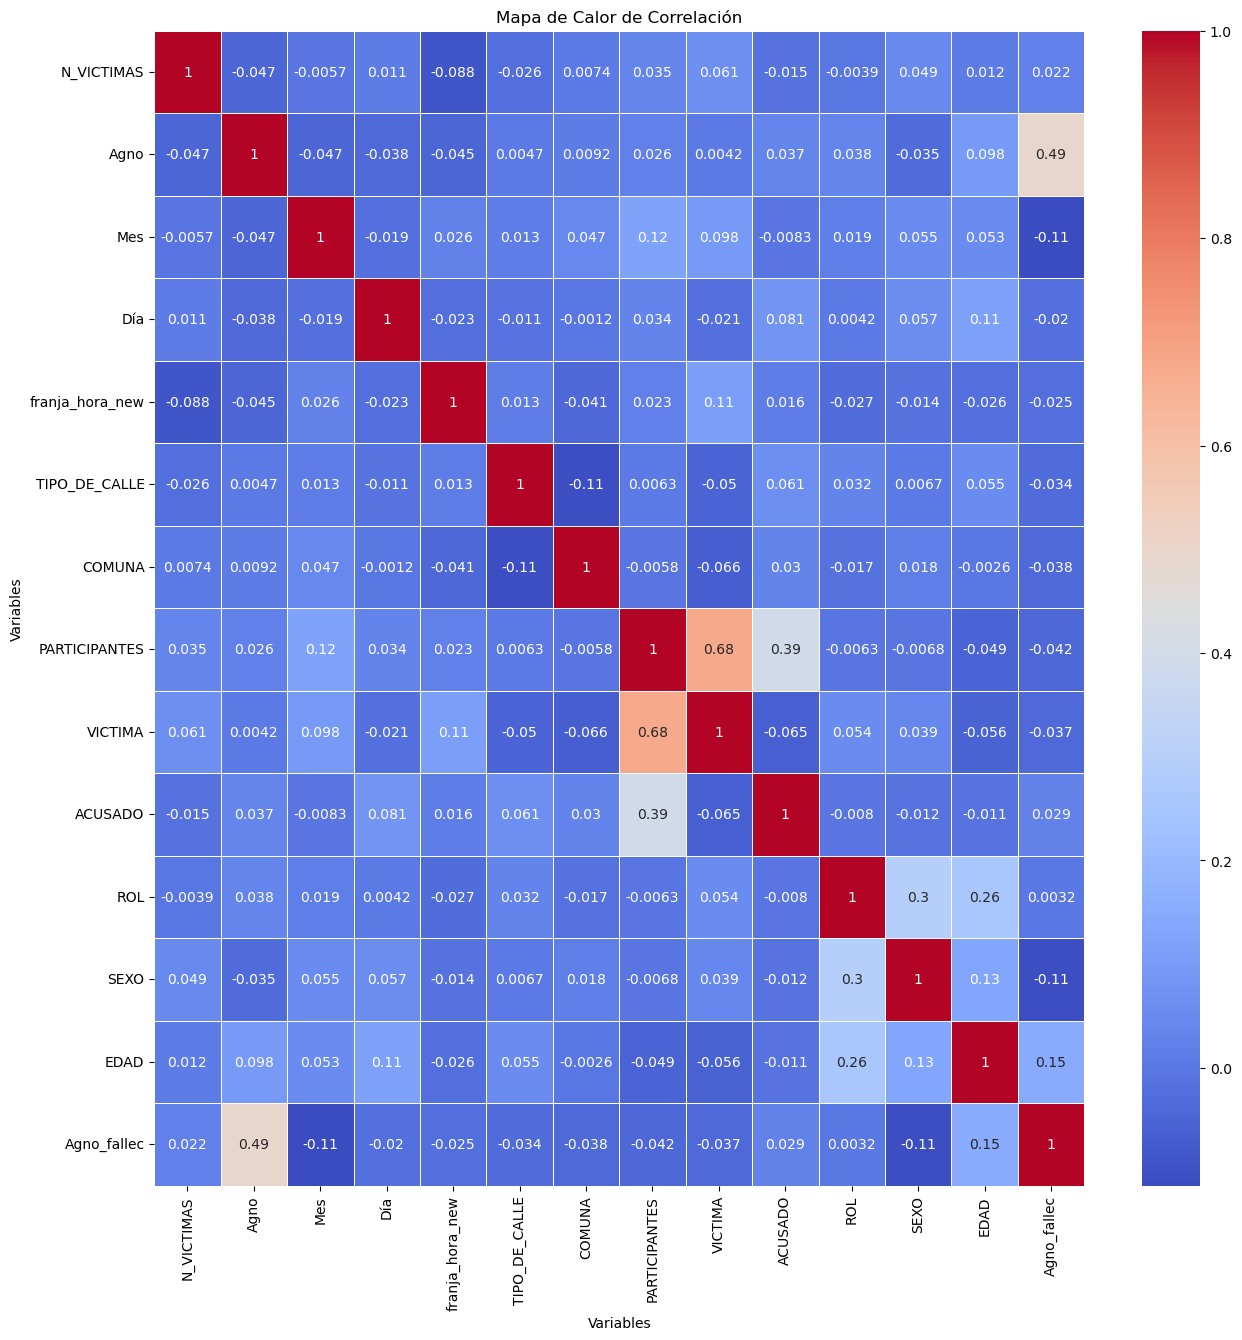

In [153]:
# Ya se calculó la matriz, ahora habrá que graficarla
# Crear el mapa de calor
plt.figure(figsize=(15, 15))  # Ajusta el tamaño del gráfico según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Personalización (opcional)
plt.title("Mapa de Calor de Correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Muestra el gráfico
plt.show()

La matriz de correlación proporciona información sobre cómo las variables se relacionan entre sí. 
Aquí hay algunas conclusiones que se pueden extraer de la matriz de correlación:

**Correlaciones positivas y negativas:**
- Los valores cercanos a 1 indican una correlación positiva fuerte, mientras que los valores cercanos a -1 indican una correlación negativa fuerte.
Por ejemplo, la correlación positiva entre “VICTIMA” y “PARTICIPANTES” (0.675) sugiere que cuando el número de víctimas aumenta, también lo hace el número de participantes en el incidente.

- La correlación negativa entre “franja_hora_new” y “N_VICTIMAS” (-0.087807) sugiere que ciertas franjas horarias pueden estar relacionadas con menos víctimas.

**Variables más influyentes:**
- Las variables con correlaciones más altas (positivas o negativas) con “N_VICTIMAS” pueden ser las más influyentes en la cantidad de víctimas.
Por ejemplo, “Agno_fallec” tiene una correlación positiva significativa (0.491967) con “N_VICTIMAS”, lo que sugiere que los años en los que ocurrieron los fallecimientos pueden estar relacionados con el número de víctimas.

**Variables poco correlacionadas:**
- Las correlaciones cercanas a cero indican que las variables no están fuertemente relacionadas entre sí.
Por ejemplo, “Día” y “Mes” tienen una correlación cercana a cero (0.011469), lo que sugiere que no hay una relación clara entre el día y el mes en términos de víctimas.

**Variables independientes:**
- Las variables con correlaciones cercanas a cero o sin correlación pueden considerarse independientes entre sí.
Por ejemplo, “ROL” y “SEXO” tienen una correlación muy baja (0.003196), lo que sugiere que no están relacionadas en términos de víctimas.

Cabe recordar que la correlación no implica causalidad. Es importante interpretar estas relaciones con cautela y considerar otros factores antes de sacar conclusiones definitivas. 

In [ ]:
data_lesionados_gral.head(2)

,Unnamed: 0,id,n_victimas,agno,mes,dia,franja_hora_new,comuna,geocodificacion_CABA,longitud,latitud,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,0,LC-2019-0000179,1,2019,1,1,9,14,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,CICLISTA-SD,0,0,0,0,1,SD
1,1,LC-2019-0000053,1,2019,1,1,1,8,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,AUTO-SD,0,1,0,0,0,SD


In [ ]:
data_lesionados_espec.head(2)

,Unnamed: 0,ID hecho,AAA,MM,DD,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,0,LC-2019-0000053,2019,1,1,SD,MASCULINO,57,SD
1,1,LC-2019-0000063,2019,1,1,SD,SD,0,SD


In [108]:
# Unir las datas de homicidio gral y específico
df_unido_lesionados = pd.merge(data_lesionados_gral[[   "id", "n_victimas", "agno", "mes", "dia", "franja_hora_new", "comuna",
                                                        "longitud", "latitud", "victima", "acusado", "participantes",
                                                        "moto", "auto", "transporte_publico", "camion", "ciclista", "gravedad"]],
                                data_lesionados_espec[[ "ID hecho", "AAA", "MM", "DD", "VEHICULO_VICTIMA", "SEXO", "EDAD_VICTIMA",
                                                        "GRAVEDAD"]],
                                                        left_index=True, right_index=True)

In [114]:
df_unido_lesionados.tail(2)

,id,n_victimas,agno,mes,dia,franja_hora_new,comuna,longitud,latitud,victima,...,ciclista,gravedad,ID hecho,AAA,MM,DD,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
23783,LC-2021-0652921,1,2021,12,31,22,5,-58.414532050899,-34.614288229345,MOTO,...,0,GRAVE,LC-2021-0503405,2021,10,11,SD,FEMENINO,61,SD
23784,LC-2020-0244615,1,2020,5,17,21,0,-5829963273,-3472890716,MOTO,...,0,SD,LC-2021-0503803,2021,10,11,SD,MASCULINO,33,SD


In [117]:
# Revisar columnas
df_unido_lesionados["victima"].unique()

array(['CICLISTA', 'AUTO', 'SD', 'PEATON', 'MOTO', 'TRANSPORTE PUBLICO',
       'CAMIONETA', 'MOVIL', 'OTRO', 'CAMION', 'MONOPATIN', 'UTILITARIO',
       'TAXI', 'MIXTO'], dtype=object)

In [120]:
# Reemplazar los valores
df_unido_lesionados["victima"] = df_unido_lesionados["victima"].replace({
    "CICLISTA": 0,
    "AUTO": 1,
    "SD": 2,
    "PEATON": 3,
    "MOTO": 4,
    "TRANSPORTE PUBLICO": 5,
    "CAMIONETA": 6,
    "MOVIL": 7,
    "OTRO": 8,
    "CAMION": 9,
    "MONOPATIN": 10,
    "UTILITARIO": 11,
    "TAXI": 12,
    "MIXTO": 13
})

In [124]:
# Revisar columnas
df_unido_lesionados["acusado"].unique()

array(['SD', 'AUTO', 'CICLISTA', 'MOVIL', 'CAMIONETA', 'MOTO', 'TAXI',
       'TRANSPORTE PUBLICO', 'CAMION', 'OBJETO FIJO', 'OTRO',
       'UTILITARIO', 'PEATON', 'MONOPATIN'], dtype=object)

In [125]:
# Reemplazar los valores
df_unido_lesionados["acusado"] = df_unido_lesionados["acusado"].replace({
    "SD": 0,
    "AUTO": 1,
    "CICLISTA": 2,
    "MOVIL": 3,
    "CAMIONETA": 4,
    "MOTO": 5,
    "TAXI": 6,
    "TRANSPORTE PUBLICO": 7,
    "CAMION": 8,
    "OBJETO FIJO": 9,
    "OTRO":10,
    "UTILITARIO": 11,
    "PEATON": 12,
    "MONOPATIN": 13
})

In [127]:
# Revisar columnas
df_unido_lesionados["participantes"].unique()

array(['CICLISTA-SD', 'AUTO-SD', 'SD-SD', 'PEATON-SD', 'MOTO-SD',
       'TRANSPORTE PUBLICO-SD', 'CAMIONETA-SD', 'MOVIL-SD', 'OTRO-SD',
       'CAMION-SD', 'MONOPATIN-SD', 'UTILITARIO-SD', 'TAXI-SD',
       'CICLISTA-AUTO', 'MOTO-CICLISTA', 'CICLISTA-MOVIL',
       'PEATON-CICLISTA', 'CICLISTA-CAMIONETA', 'CICLISTA-MOTO',
       'CICLISTA-TAXI', 'CICLISTA-TRANSPORTE PUBLICO', 'CICLISTA-CAMION',
       'CICLISTA-OBJETO FIJO', 'CICLISTA-OTRO', 'CICLISTA-CICLISTA',
       'CICLISTA-UTILITARIO', 'AUTO-CICLISTA', 'MOTO-OBJETO FIJO',
       'AUTO-AUTO', 'AUTO-OBJETO FIJO', 'MOTO-AUTO', 'PEATON-TAXI',
       'MOTO-TAXI', 'PEATON-TRANSPORTE PUBLICO',
       'TRANSPORTE PUBLICO-TRANSPORTE PUBLICO', 'MOTO-CAMIONETA',
       'AUTO-CAMION', 'PEATON-AUTO', 'CAMIONETA-TAXI', 'CAMIONETA-AUTO',
       'SD-AUTO', 'PEATON-CAMIONETA', 'MOTO-OTRO', 'AUTO-CAMIONETA',
       'TAXI-MOVIL', 'SD-MOTO', 'PEATON-MOTO', 'MOTO-TRANSPORTE PUBLICO',
       'MIXTO-TRANSPORTE PUBLICO', 'TRANSPORTE PUBLICO-CAMIONETA',

In [133]:
# Reemplazar los valores
df_unido_lesionados["participantes"] = df_unido_lesionados["participantes"].replace({
       "CICLISTA-SD": 0,
       "AUTO-SD": 1,
       "SD-SD": 2,
       "TRANSPORTE PUBLICO-SD": 3,
       "CAMIONETA-SD": 4,
       "MOVIL-SD": 5,
       "OTRO-SD": 6,
       "CAMION-SD": 7,
       "MONOPATIN-SD":8,
       "UTILITARIO-SD": 9,
       "TAXI-SD": 10,
       "CICLISTA-AUTO": 11,
       "MOTO-CICLISTA": 12,
       "CICLISTA-MOVIL": 13,
       "PEATON-CICLISTA": 14,
       "CICLISTA-CAMIONETA": 15,
       "CICLISTA-MOTO": 16,
       "CICLISTA-TAXI": 17,
       "CICLISTA-TRANSPORTE PUBLICO": 18,
       "CICLISTA-CAMION": 19,
       "CICLISTA-OBJETO FIJO": 20,
       "CICLISTA-OTRO": 21,
       "CICLISTA-CICLISTA": 22,
       "CICLISTA-UTILITARIO": 23,
       "AUTO-CICLISTA": 24,
       "MOTO-OBJETO FIJO": 25,
       "AUTO-AUTO": 26,
       "AUTO-OBJETO FIJO": 27,
       "MOTO-AUTO": 28,
       "PEATON-TAXI": 29,
       "MOTO-TAXI": 30,
       "PEATON-TRANSPORTE PUBLICO": 31,
       "TRANSPORTE PUBLICO-TRANSPORTE PUBLICO": 34,
       "MOTO-CAMIONETA": 35,
       "AUTO-CAMION": 36,
       "PEATON-AUTO": 37,
       "CAMIONETA-TAXI": 38,
       "CAMIONETA-AUTO": 39,
       "SD-AUTO": 40,
       "PEATON-CAMIONETA": 41,
       "MOTO-OTRO": 42,
       "AUTO-CAMIONETA": 43,
       "TAXI-MOVIL": 44,
       "SD-MOTO": 45,
       "PEATON-MOTO": 46,
       "MOTO-TRANSPORTE PUBLICO": 47,
       "MIXTO-TRANSPORTE PUBLICO": 48,
       "TRANSPORTE PUBLICO-CAMIONETA": 49,
       "MOTO-MOTO": 50,
       "MOTO-CAMION": 51,
       "SD-TRANSPORTE PUBLICO": 52,
       "AUTO-TRANSPORTE PUBLICO": 53,
       "MONOPATIN-TAXI": 54,
       "AUTO-MOTO": 55,
       "TAXI-AUTO": 56,
       "TRANSPORTE PUBLICO-MOTO": 57,
       "CAMIONETA-CAMIONETA": 58,
       "TRANSPORTE PUBLICO-AUTO": 59,
       "MOVIL-AUTO": 60,
       "CAMION-CAMION": 61,
       "MOVIL-TRANSPORTE PUBLICO": 62,
       "MIXTO-SD": 63,
       "TAXI-CAMION": 64,
       "AUTO-MOVIL": 65,
       "MIXTO-CAMION": 66,
       "AUTO-TAXI": 67,
       "CAMION-OBJETO FIJO": 68,
       "TAXI-CAMIONETA": 69, 
       "PEATON-CAMION": 70,
       "PEATON-OBJETO FIJO": 71,
       "PEATON-MOVIL": 72,
       "MOTO-PEATON": 73,
       "CAMIONETA-TRANSPORTE PUBLICO": 74,
       "TAXI-TRANSPORTE PUBLICO": 75,
       "SD-OTRO": 76,
       "MONOPATIN-AUTO": 77,
       "TAXI-TAXI": 76,
       "TRANSPORTE PUBLICO-CAMION": 77,
       "CAMIONETA-CAMION": 78,
       "CICLISTA-PEATON": 79,
       "TRANSPORTE PUBLICO-CICLISTA": 80,
       "MONOPATIN-CICLISTA": 81,
       "MOVIL-TAXI": 82,
       "OTRO-TRANSPORTE PUBLICO": 83,
       "MIXTO-CAMIONETA": 84,
       "MONOPATIN-MOTO": 85,
       "SD-MOVIL": 86,
       "MONOPATIN-CAMIONETA": 87,
       "OTRO-CAMION": 88,
       "TRANSPORTE PUBLICO-OBJETO FIJO": 89,
       "CAMION-MOTO": 90,
       "CAMION-TRANSPORTE PUBLICO": 91,
       "CAMIONETA-MOTO": 92,
       "CAMIONETA-OBJETO FIJO": 93,
       "PEATON-MONOPATIN": 94,
       "MOTO-MOVIL": 95,
       "TAXI-OBJETO FIJO": 96,
       "PEATON-OTRO": 97,
       "TRANSPORTE PUBLICO-TAXI": 98,
       "MOVIL-MOTO": 99,
       "MIXTO-AUTO": 100,
       "MOVIL-CAMION": 101,
       "AUTO-OTRO": 102,
       "SD-CAMION": 103,
       "SD-CAMIONETA": 104,
       "SD-OBJETO FIJO": 105,
       "MOVIL-CAMIONETA": 106,
       "MOVIL-MOVIL": 107,
       "MOTO-UTILITARIO": 108,
       "PEATON-UTILITARIO":109,
       "AUTO-UTILITARIO": 110,
       "UTILITARIO-UTILITARIO": 111,
       "UTILITARIO-TAXI": 112,
       "MOVIL-UTILITARIO": 113,
       "UTILITARIO-CAMION": 114,
       "UTILITARIO-AUTO": 115,
       "MOVIL-OBJETO FIJO": 116,
       "SD-TAXI": 117,
       "CAMION-AUTO": 118,
       "MOTO-MONOPATIN": 119,
       "MIXTO-MOTO": 120,
       "TAXI-MOTO": 121,
       "MONOPATIN-TRANSPORTE PUBLICO": 122,
       "MIXTO-TAXI": 123,
       "OTRO-AUTO": 124,
       "MONOPATIN-OBJETO FIJO": 125,
       "PEATON-SD": 126,
       "MOTO-SD": 127
})

In [140]:
# Revisar columnas
df_unido_lesionados["VEHICULO_VICTIMA"].unique()

array(['SD', 'MOTO', 'AUTO', 'TAXI', 'PEATON', 'CICLISTA',
       'TRANSPORTE PUBLICO', 'MOVIL', 'CAMION', 'UTILITARIO', 'MONOPATIN',
       'MIXTO', 'OTRO'], dtype=object)

In [141]:
# Reemplazar los valores
df_unido_lesionados["VEHICULO_VICTIMA"] = df_unido_lesionados["VEHICULO_VICTIMA"].replace({
       "SD": 0,
       "MOTO": 1,
       "AUTO": 2,
       "TAXI": 3,
       "PEATON": 4,
       "CICLISTA": 5,
       "TRANSPORTE PUBLICO": 6,
       "MOVIL": 7,
       "CAMION": 8,
       "UTILITARIO": 9,
       "MONOPATIN": 10,
       "MIXTO": 11,
       "OTRO": 12
})

In [143]:
# Revisar columnas
df_unido_lesionados["SEXO"].unique()

array(['MASCULINO', 'SD', 'FEMENINO'], dtype=object)

In [144]:
# Reemplazar los valores
df_unido_lesionados["SEXO"] = df_unido_lesionados["SEXO"].replace({
        "MASCULINO": 0,
        "SD": 1,
        "FEMENINO": 2
})

In [146]:
# Revisar columnas
df_unido_lesionados["gravedad"].unique()

array(['SD', 'GRAVE', 'FATAL'], dtype=object)

In [147]:
# Reemplazar los valores
df_unido_lesionados["gravedad"] = df_unido_lesionados["gravedad"].replace({
        "SD": 0,
        "GRAVE": 1,
        "FATAL": 2
})

In [148]:
# Revisar columnas
df_unido_lesionados["GRAVEDAD"].unique()

array(['SD', 'GRAVE'], dtype=object)

In [149]:
# Reemplazar los valores
df_unido_lesionados["GRAVEDAD"] = df_unido_lesionados["GRAVEDAD"].replace({
        "SD": 0,
        "GRAVE": 1
})

In [150]:
# Supongamos que has eliminado la columna id, ID hecho, longitud, etc.:
correlation_matrix_les = df_unido_lesionados.drop(columns=["id","ID hecho", "longitud", "latitud", "latitud", "moto", "auto",
                                                    "transporte_publico", "camion", "ciclista"]).corr()
correlation_matrix_les

,n_victimas,agno,mes,dia,franja_hora_new,comuna,victima,acusado,participantes,gravedad,AAA,MM,DD,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
n_victimas,1.000000,-0.009859,0.012012,0.000930,-0.000432,0.013712,0.049082,0.003766,-0.030704,0.031105,0.009837,-0.029461,-0.002304,-0.004937,0.009493,-0.001870,-0.002362
agno,-0.009859,1.000000,0.096304,-0.001380,-0.067644,-0.008319,0.146326,0.397829,0.088942,0.109397,0.894451,0.210155,0.022243,0.468454,0.001055,0.044725,0.121686
mes,0.012012,0.096304,1.000000,-0.004313,-0.029731,0.017217,-0.043856,-0.068651,-0.069693,0.007401,0.288366,0.219916,-0.001441,0.101937,-0.006403,0.020439,0.035464
dia,0.000930,-0.001380,-0.004313,1.000000,-0.004725,-0.006358,-0.004710,-0.015225,-0.028803,0.008502,0.023628,0.024225,-0.011102,0.023773,0.004112,0.000759,0.005567
franja_hora_new,-0.000432,-0.067644,-0.029731,-0.004725,1.000000,-0.006145,-0.099109,-0.180441,-0.093931,-0.062945,-0.013497,-0.171488,-0.030216,-0.113668,-0.003206,-0.007311,-0.002552
comuna,0.013712,-0.008319,0.017217,-0.006358,-0.006145,1.000000,0.001096,-0.021946,0.018314,-0.059252,-0.017815,0.001277,-0.006678,-0.014295,-0.002580,-0.002062,0.005529
victima,0.049082,0.146326,-0.043856,-0.004710,-0.099109,0.001096,1.000000,0.211774,0.446406,0.026336,0.208699,0.042878,-0.024629,0.132559,0.002020,-0.011784,0.012683
acusado,0.003766,0.397829,-0.068651,-0.015225,-0.180441,-0.021946,0.211774,1.000000,0.166612,0.094138,0.294176,0.133638,0.018302,0.206546,0.000560,0.006402,0.039346
participantes,-0.030704,0.088942,-0.069693,-0.028803,-0.093931,0.018314,0.446406,0.166612,1.000000,0.015355,0.081122,0.043614,-0.020980,0.072600,-0.000788,0.003159,0.008373
gravedad,0.031105,0.109397,0.007401,0.008502,-0.062945,-0.059252,0.026336,0.094138,0.015355,1.000000,0.105402,0.028461,-0.005987,0.056387,-0.005171,0.005663,0.011850


De la matriz de correlación, podemos extraer algunas conclusiones importantes:

**Variables independientes:**
   - Las correlaciones cercanas a cero (por ejemplo, "dia" y "franja_hora_new") sugieren que estas variables no están fuertemente relacionadas entre sí.
   - Esto podría indicar que el día del mes y la franja horaria no afectan significativamente el número de víctimas.

**Variables con baja correlación:**
   - La correlación entre "n_victimas" y "edad_victima" es muy baja (-0.001870), lo que sugiere que la edad de la víctima no está fuertemente relacionada con el número de víctimas.

**Variables con alta correlación negativa:**
   - La correlación negativa entre "franja_hora_new" y "acusado" (-0.180441) sugiere que ciertas franjas horarias pueden estar relacionadas con menos acusados involucrados en los incidentes.

**Variables con alta correlación positiva:**
   - La correlación positiva entre "victima" y "participantes" (0.446406) sugiere que cuando el número de víctimas aumenta, también lo hace el número de participantes en el incidente.

En general, la matriz de correlación proporciona información valiosa sobre las relaciones entre las variables. Sin embargo, hay que recordar que la correlación no implica causalidad.

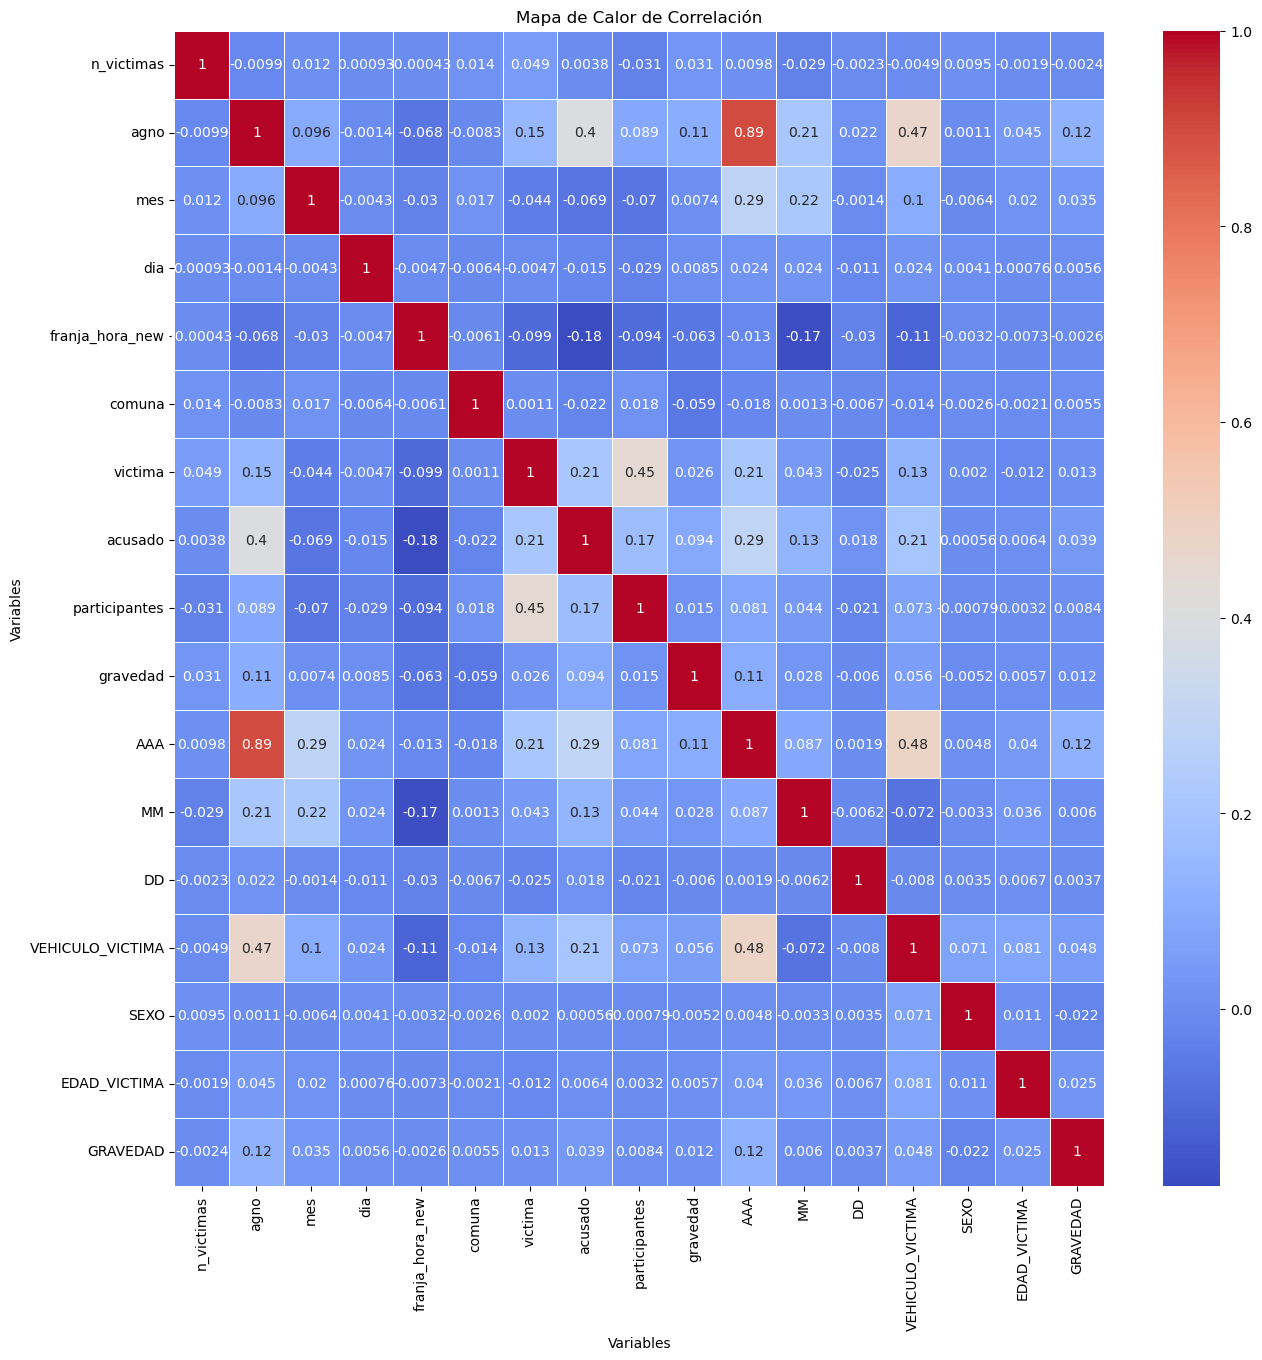

In [152]:
# Ya se calculó la matriz, ahora habrá que graficarla
# Crear el mapa de calor
plt.figure(figsize=(15, 15))  # Ajusta el tamaño del gráfico según tus preferencias
sns.heatmap(correlation_matrix_les, annot=True, cmap='coolwarm', linewidths=0.5)

# Personalización (opcional)
plt.title("Mapa de Calor de Correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")

# Muestra el gráfico
plt.show()

In [ ]:
# Fallecidos por año, cuántos años existen en la columna de Año_fallecido?
data_homicidios_espec["Agno_fallec"].unique()

array([2016, 1970, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [ ]:
# Fallecidos por año, suma total
data_homicidios_espec["Agno_fallec"].count()

717

In [ ]:
# Agrupa los datos por año y cuenta el número de registros en cada grupo
fallecidos_por_año = data_homicidios_espec["Agno_fallec"].groupby(data_homicidios_espec["Agno_fallec"]).size()

<Axes: title={'center': 'Fallecidos por Año'}, xlabel='Año', ylabel='Número de fallecidos'>

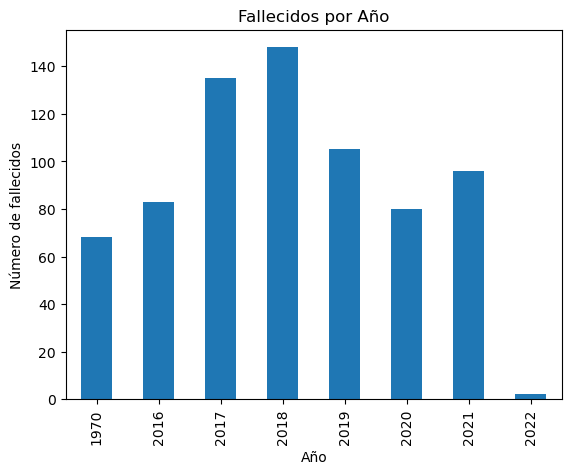

In [ ]:
# Crea el gráfico de barras para mostrar el número de fallecidos por año
fallecidos_por_año.plot(kind="bar", xlabel="Año", ylabel="Número de fallecidos", title="Fallecidos por Año")

In [ ]:
import pingouin as pg

In [ ]:
fallecidos_por_año

Agno_fallec
1970     68
2016     83
2017    135
2018    148
2019    105
2020     80
2021     96
2022      2
Name: Agno_fallec, dtype: int64

In [ ]:
# Crear un DataFrame de Agno_fallec
data = {
    "Agno_fallec": np.random.normal(loc=50, scale=10, size=100)
}
df = pd.DataFrame(data)

In [ ]:
# Realizar la prueba de normalidad
result = pg.normality(df["Agno_fallec"], alpha=0.05)

In [ ]:
print("Estadística de prueba:", result['W'])
print("Valor p:", result['pval'])

Estadística de prueba: Agno_fallec    0.992117
Name: W, dtype: float64
Valor p: Agno_fallec    0.829652
Name: pval, dtype: float64


In [ ]:
if result['normal'].all():
    print("La columna 'fallecido' sigue una distribución normal.")
else:
    print("La columna 'fallecido' no sigue una distribución normal.")


La columna 'fallecido' sigue una distribución normal.


**Resultado:**
- Estadística de prueba (W):

- La estadística de prueba (W) es un valor calculado por la prueba de normalidad. En este caso, el valor de W es aproximadamente 0.9868 para la columna “Agno_fallec”.

- Esta estadística se utiliza para evaluar si los datos siguen una distribución normal. Cuanto más cercano esté W a 1, más se asemejarán los datos a una distribución normal.

**Valor p (p-value):**
- El valor p (p-value) es otro resultado importante de la prueba de normalidad. En este caso, el valor p es aproximadamente 0.4223 para la columna “Agno_fallec”.

- El valor p representa la probabilidad de obtener los resultados observados si la hipótesis nula (que los datos siguen una distribución normal) es verdadera.

- Si el valor p es menor que un nivel de significancia (por ejemplo, 0.05), rechazaríamos la hipótesis nula y concluiríamos que los datos no siguen una distribución normal. En este caso, como el valor p es mayor que 0.05, no rechazamos la hipótesis nula.

**Interpretación:**
- Dado que el valor p es mayor que 0.05, no tenemos evidencia suficiente para afirmar que la columna “Agno_fallec” no sigue una distribución normal.
En otras palabras, los datos podrían seguir una distribución normal.

In [ ]:
# Agrupa los datos por sexo y año de fallecimiento
agrupado_sexo_fall = data_homicidios_espec.groupby(["SEXO", "Agno_fallec"]).size()

In [ ]:
agrupado_sexo_fall

SEXO       Agno_fallec
FEMENINO   1970            15
           2016            12
           2017            36
           2018            38
           2019            27
           2020            15
           2021            23
MASCULINO  1970            47
           2016            71
           2017            99
           2018           110
           2019            78
           2020            65
           2021            73
           2022             2
SD         1970             6
dtype: int64

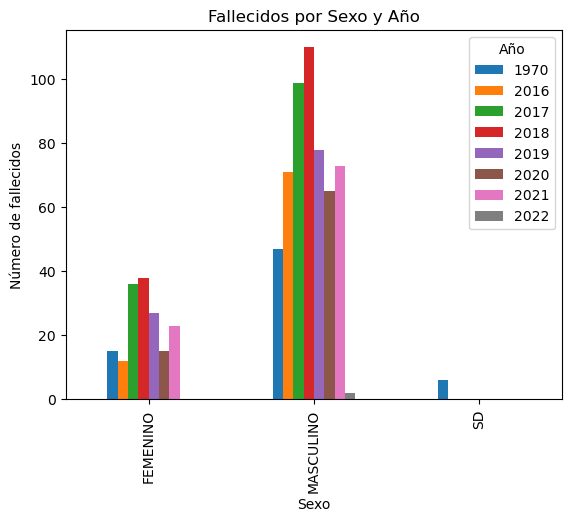

In [ ]:
# Crea un gráfico de barras para mostrar el número de fallecidos por sexo y año
agrupado_sexo_fall.unstack().plot(kind="bar", xlabel="Sexo", ylabel="Número de fallecidos", title="Fallecidos por Sexo y Año")
plt.legend(title="Año")
plt.show()

In [ ]:
data_homicidios_espec.columns

Index(['Unnamed: 0', 'ID_hecho', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'Agno_fallec', 'Mes_fallec', 'Día_fallec'],
      dtype='object')

In [ ]:
data_lesionados_espec.columns

Index(['Unnamed: 0', 'ID hecho', 'AAA', 'MM', 'DD', 'VEHICULO_VICTIMA', 'SEXO',
       'EDAD_VICTIMA', 'GRAVEDAD'],
      dtype='object')

In [ ]:
# Agrupa los datos por edad y año de fallecimiento
agrupado_edad_fall = data_homicidios_espec.groupby(["EDAD", "Agno_fallec"]).size()

In [ ]:
agrupado_edad_fall

EDAD  Agno_fallec
0     1970           15
      2016            1
      2017            7
      2018            8
      2019           12
                     ..
87    2020            2
88    2021            1
91    2020            2
92    2019            1
95    2017            1
Length: 341, dtype: int64

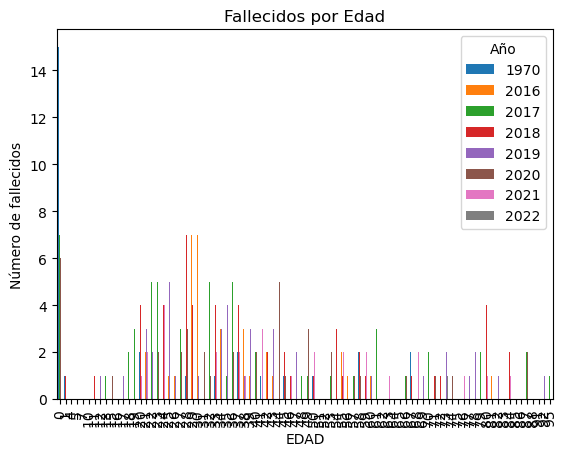

In [ ]:
# Crea un gráfico de barras para mostrar el número de fallecidos por edad
agrupado_edad_fall.unstack().plot(kind="bar", xlabel="EDAD", ylabel="Número de fallecidos", title="Fallecidos por Edad")
plt.legend(title="Año")
plt.show()

In [ ]:
# Lesionados por año, cuántos años existen en la columna de Año_lesionado?
# Lesionados por año
data_lesionados_espec["AAA"].unique()

array([2019, 2020, 2021], dtype=int64)

In [ ]:
# Lesionados por año, suma total
data_lesionados_espec["AAA"].count()

27605

In [ ]:
# Agrupa los datos por año y cuenta el número de registros en cada grupo
lesionados_por_año = data_lesionados_espec["AAA"].groupby(data_lesionados_espec["AAA"]).size()

In [ ]:
lesionados_por_año

AAA
2019    11793
2020     6855
2021     8957
Name: AAA, dtype: int64

<Axes: title={'center': 'Lesionados por Año'}, xlabel='Año', ylabel='Número de lesionados'>

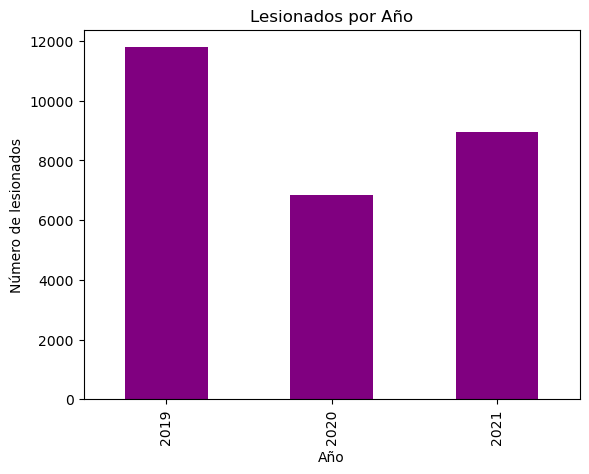

In [ ]:
# Crea el gráfico de barras para mostrar el número de lesionados por año
lesionados_por_año.plot(kind="bar", xlabel="Año", ylabel="Número de lesionados", title="Lesionados por Año", color= "purple")

In [ ]:
# Agrupa los datos por sexo y año de fallecimiento
agrupado_sexo_lesion = data_lesionados_espec.groupby(["SEXO", "AAA"]).size()

In [ ]:
agrupado_sexo_lesion

SEXO       AAA 
FEMENINO   2019    3872
           2020    1775
           2021    2708
MASCULINO  2019    7530
           2020    4146
           2021    5346
SD         2019     391
           2020     934
           2021     903
dtype: int64

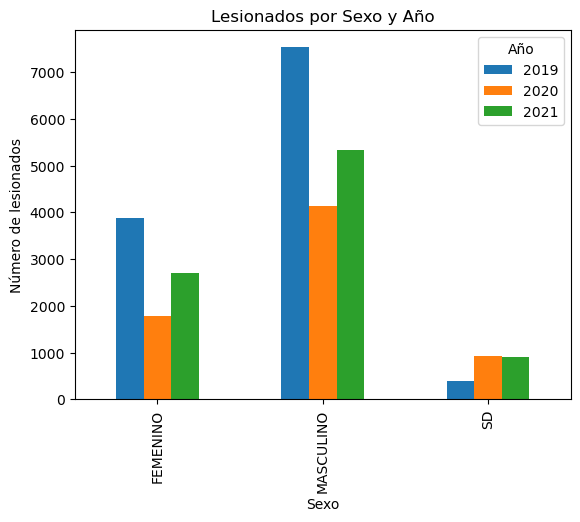

In [ ]:
# Crea un gráfico de barras para mostrar el número de fallecidos por sexo y año
agrupado_sexo_lesion.unstack().plot(kind="bar", xlabel="Sexo", ylabel="Número de lesionados", title="Lesionados por Sexo y Año")
plt.legend(title="Año")
plt.show()

In [ ]:
# DataFrame con una columna 'gravedad'
df_grave = data_lesionados_espec[data_lesionados_espec["GRAVEDAD"] == "GRAVE"]

In [ ]:
# Lesionados graves agrupados por Edad y Año
agrupado_edad_lesio = df_grave.groupby(["EDAD_VICTIMA", "AAA"]).size()

In [ ]:
agrupado_edad_lesio

EDAD_VICTIMA  AAA 
0             2020    13
              2021    13
2             2021     2
3             2020     1
              2021     1
                      ..
90            2021     1
91            2020     1
92            2020     1
95            2021     2
100           2020     1
Length: 130, dtype: int64

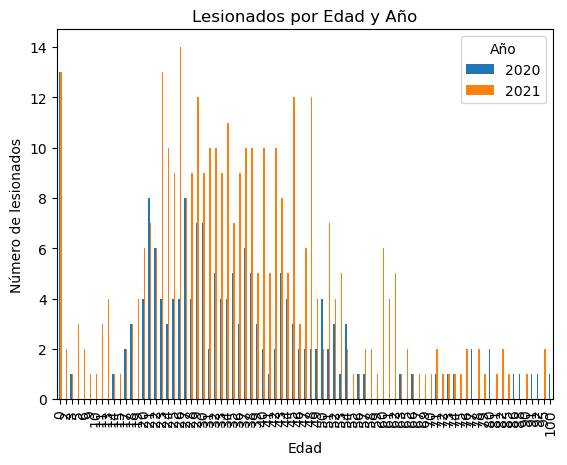

In [ ]:
# Crea el gráfico de barras para mostrar el número de lesionados graves por edad y año
agrupado_edad_lesio.unstack().plot(kind="bar", xlabel="Edad", ylabel="Número de lesionados", title="Lesionados por Edad y Año")
plt.legend(title="Año")
plt.show()

In [ ]:
# Tipo de calle y Víctima FATAL de accidente
# Supongamos que tienes un DataFrame llamado 'df' con una columna 'estado' que indica si la persona falleció
agrupado_tipo_calle = data_homicidios_gral.groupby("TIPO_DE_CALLE")["N_VICTIMAS"].sum()

In [ ]:
agrupado_tipo_calle

TIPO_DE_CALLE
AUTOPISTA     68
AVENIDA      511
CALLE        138
Name: N_VICTIMAS, dtype: int64

In [ ]:
# Datos para graficar
categorias = ["AUTOPISTA", "AVENIDA", "CALLE"]
cantidades = [68, 511, 138]

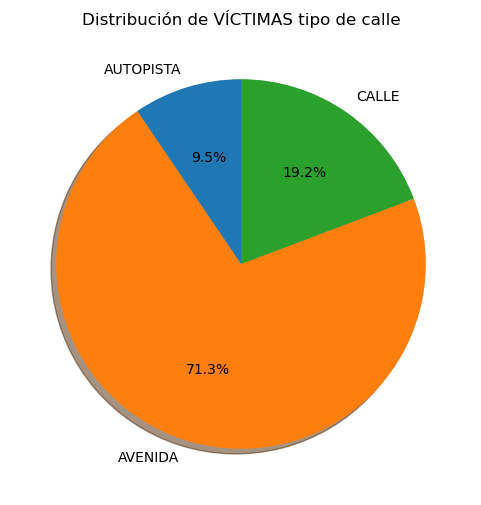

In [ ]:
# Crear el gráfico de torta
plt.figure(figsize=(6, 6))  # Tamaño opcional
plt.pie(cantidades, labels=categorias, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Distribución de VÍCTIMAS tipo de calle")

# Mostrar el gráfico
plt.show()


In [ ]:
# Abrir Archivo de Lesionados fallecidos
df_lesio_fallecidos = pd.read_csv("C:/Users/56988/Desktop/AccidViaARG/KPIs/KPI2.csv")

In [ ]:
df_lesio_fallecidos.head(2)

,Unnamed: 0,ID_hecho,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,Agno_fallec,Mes_fallec,Día_fallec,Semestre,Fallecido
0,0,2016-0001,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016,1,1,1,1
1,2,2016-0003,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016,1,3,1,1


In [ ]:
lesionad_fallecidos = df_lesio_fallecidos.groupby("Agno_fallec")["Fallecido"].sum()

In [ ]:
lesionad_fallecidos

Agno_fallec
1970    30
2016    37
2017    54
2018    57
2019    50
2020    29
2021    45
2022     1
Name: Fallecido, dtype: int64

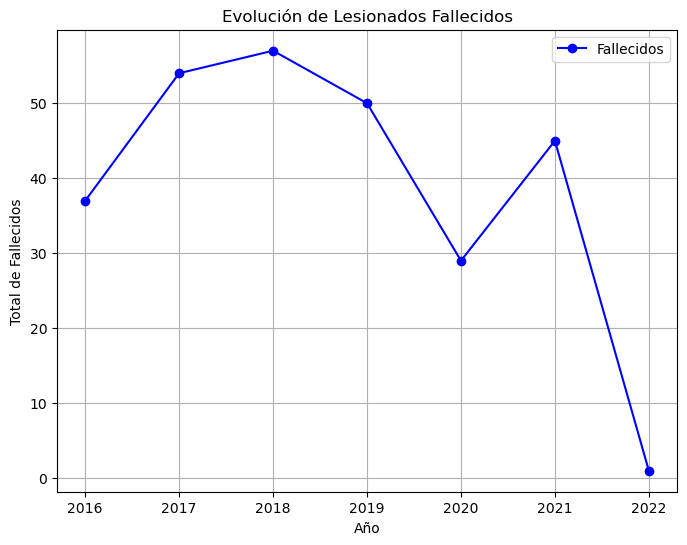

In [ ]:
# Años y cantidad de fallecidos (datos de ejemplo)
años = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
fallecidos = [37, 54, 57, 50, 29, 45, 1]

# Crear el gráfico de línea
plt.figure(figsize=(8, 6))
plt.plot(años, fallecidos, marker='o', color='b', linestyle='-', label="Fallecidos")
plt.xlabel("Año")
plt.ylabel("Total de Fallecidos")
plt.title("Evolución de Lesionados Fallecidos")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Años y cantidad de fallecidos (datos de ejemplo)
años = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
fallecidos = [37, 54, 57, 50, 29, 45, 1]
df = pd.DataFrame(años,fallecidos)

In [ ]:
# Crear DataFrame
df = pd.DataFrame({'año': años, 'fallecidos': fallecidos})

In [ ]:
# Gráfico Caja con Bigotes, pasar a numérico
df['fallecidos'] = pd.to_numeric(df['fallecidos'], errors='coerce')

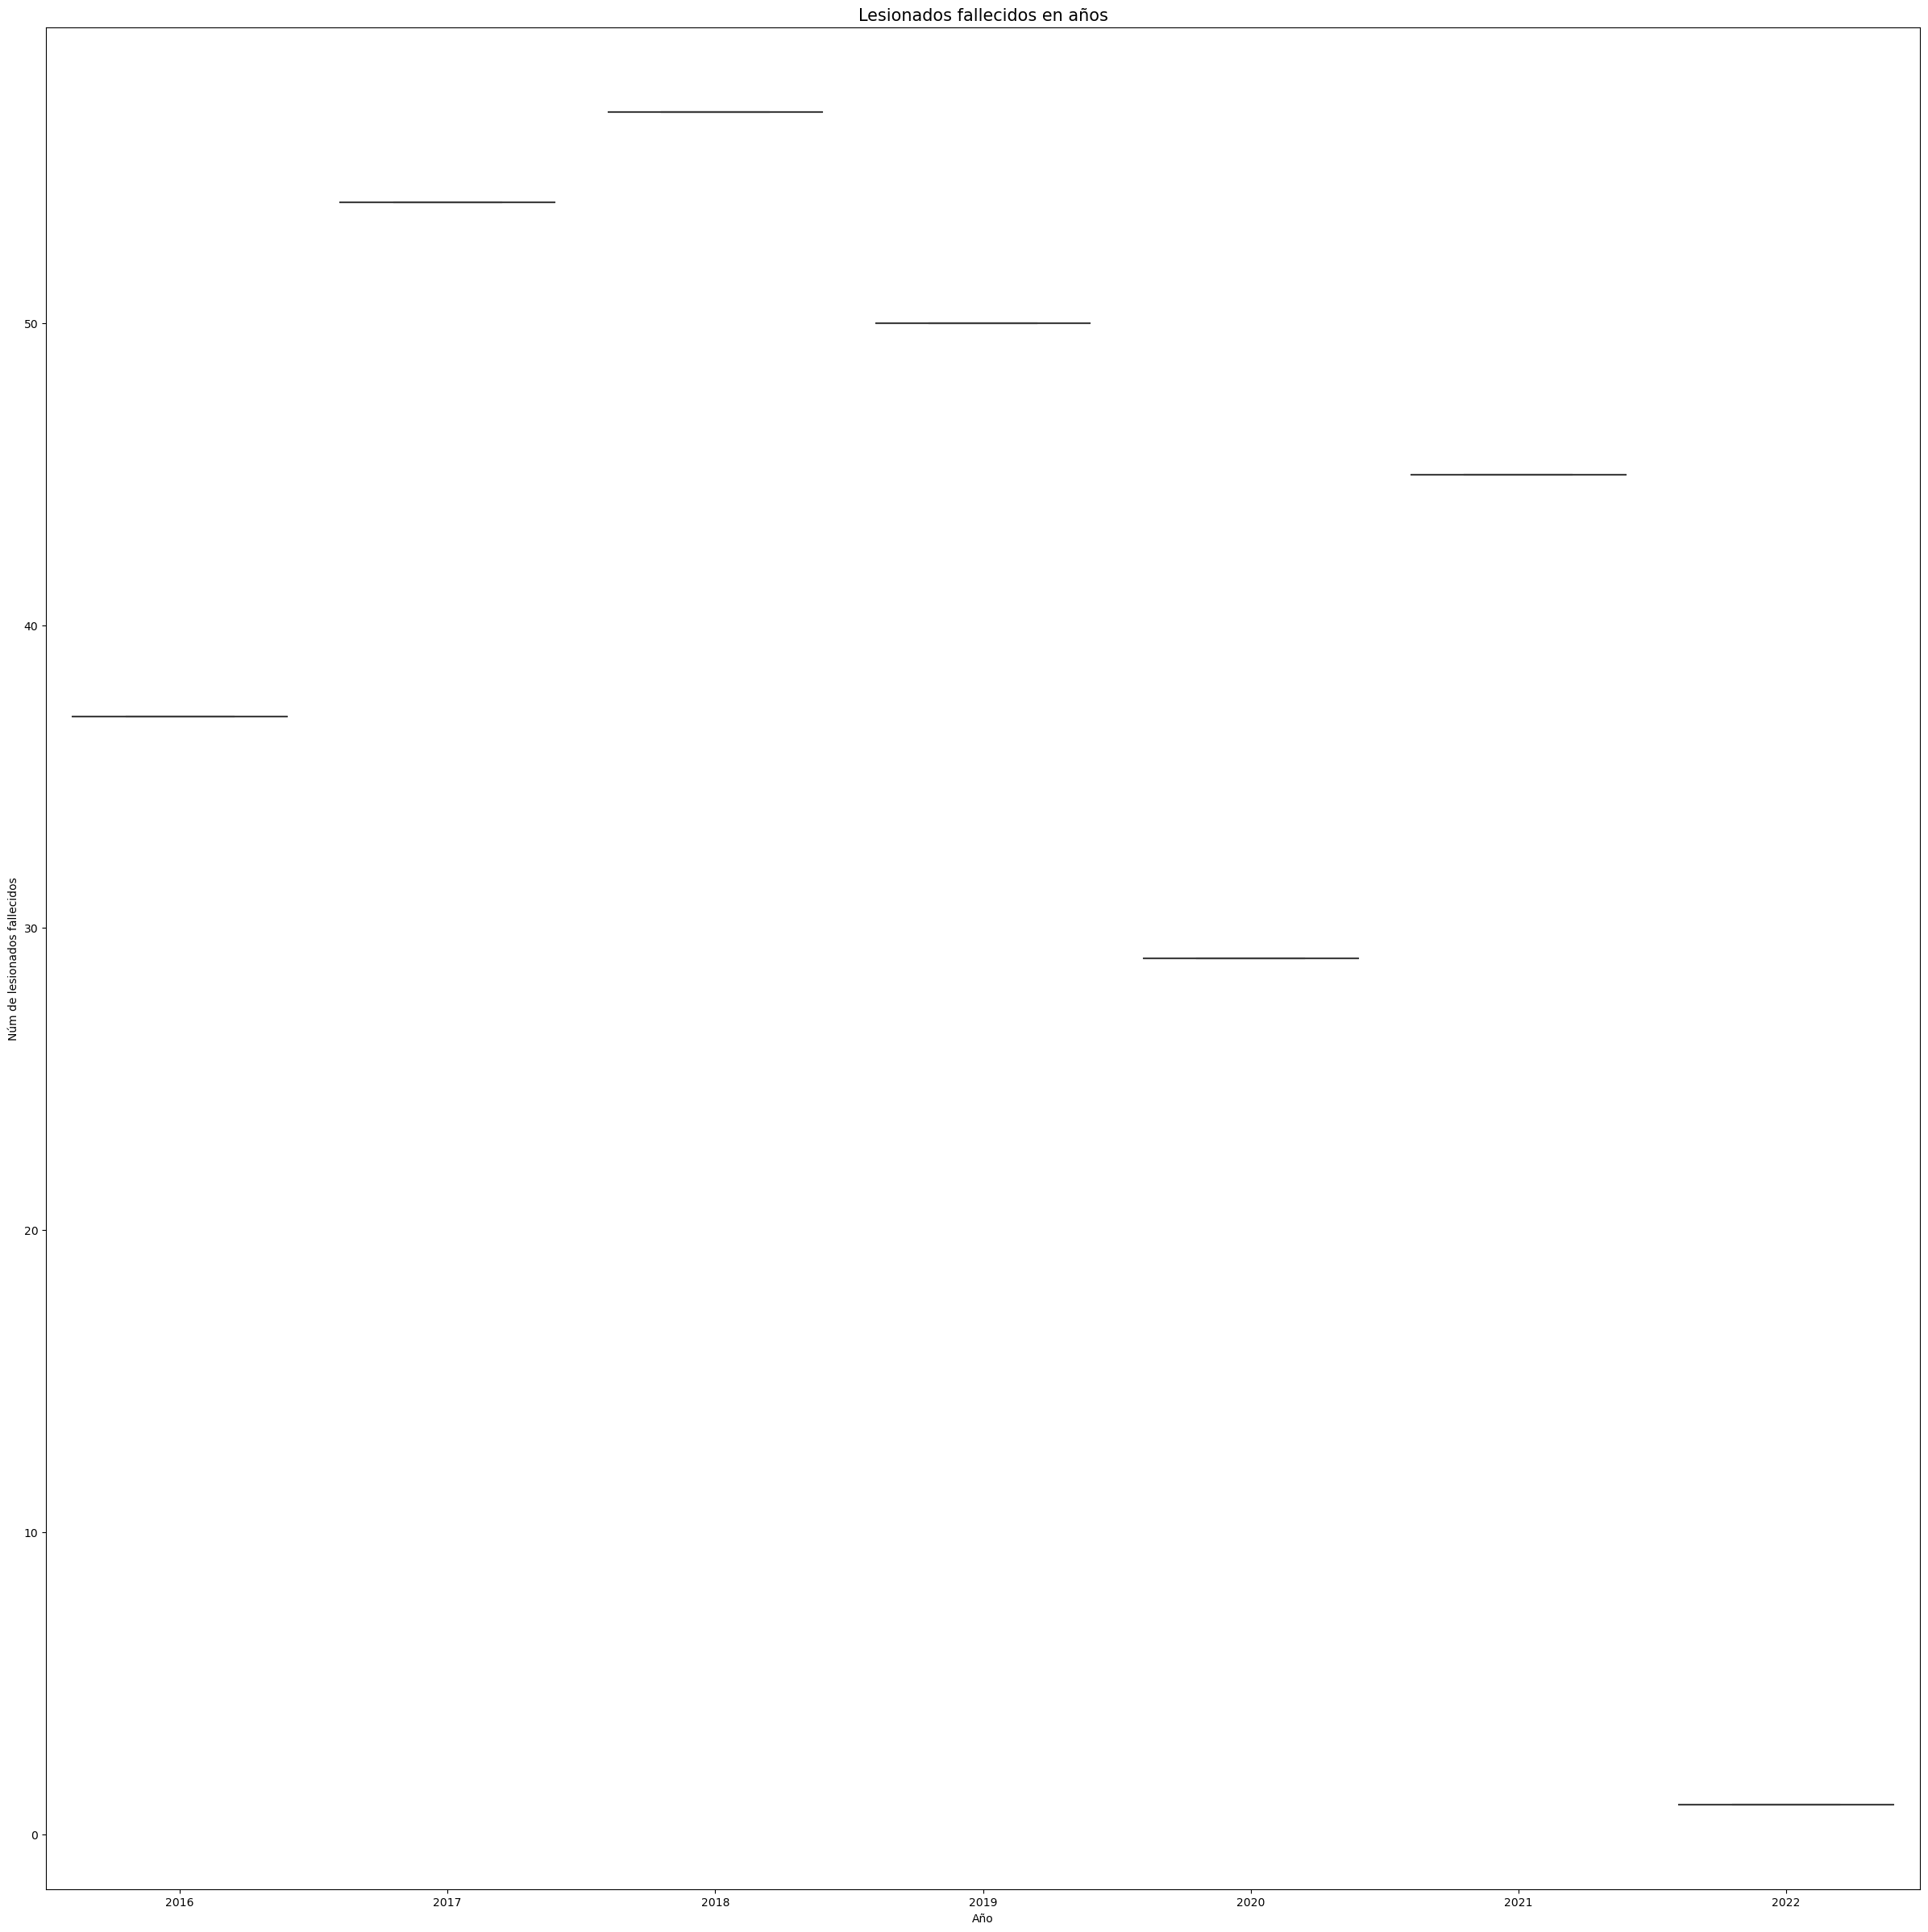

In [ ]:
# Graph
plt.figure(figsize=(30, 30))
sns.boxplot(x="año", y="fallecidos", data=df)
plt.title("Lesionados fallecidos en años", fontsize=15)
plt.xlabel("Año")
plt.ylabel("Núm de lesionados fallecidos")
plt.savefig("lesi_fall.jpg")